# Chebyshev diff mats

## p11: Chebyshev differentation of a smooth function

In [1]:
include("smij-functions.jl");

In [2]:
u = x -> exp(x) * sin(5x) 
uʹ = x -> exp(x) * (sin(5x) + 5 * cos(5x))
xx = (-200:200) / 200
vv = @. u.(xx)
results = []
for (i,N) in enumerate([10, 20])
    D, x = cheb(N)
    v = u.(x)
    error = D*v - uʹ.(x)
    ee = polyinterp(x, error).(xx)
    push!(results, (;x,v,error,ee))
end

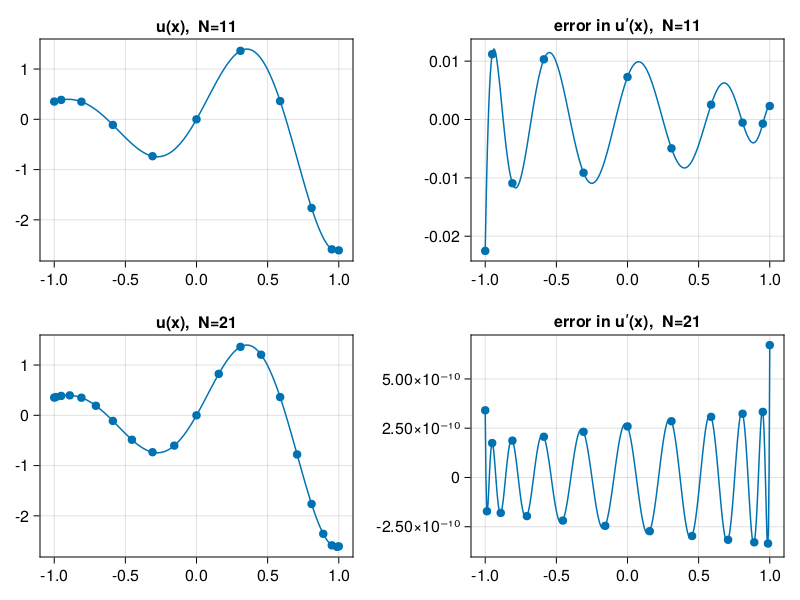

In [3]:
using CairoMakie
fig = Figure()
for (i,r) in enumerate(results)
    N = length(r.x)
    Axis(fig[i, 1], title="u(x),  N=$N")
    scatter!(r.x, r.v)
    lines!(xx, vv)
    Axis(fig[i, 2], title="error in uʹ(x),  N=$N")
    scatter!(r.x, r.error)
    lines!(xx, r.ee)
end
fig

## p12: accuracy of Chebyshev spectral differentiation

In [4]:
N = 1:50
# Compute derivatives for various values of N:
data = [ 
    # uʹʹʹ in BV
    (x -> abs(x)^3,  x -> 3x * abs(x), L"|x|^3"), 
    # C-infinity
    (x -> exp(-x^(-2)), x -> 2exp(-x^(-2)) / x^3, L"\exp(-x^{-2})"), 
    # analytic in [-1,1]
    (x -> 1 / (1 + x^2), x -> -2x / (1 + x^2)^2, L"1/(1+x^2)"),
    # polynomial 
    (x -> x^10, x -> 10x^9,  L"x^{10}")
]

results = []
for (i, (fun,deriv,title)) in enumerate(data)
    E = zeros(length(N))
    for (k,N) in enumerate(N)
        D, x = cheb(N)
        E[k] = norm(D*fun.(x) - deriv.(x), Inf)
    end
    push!(results, (;E, title))
end

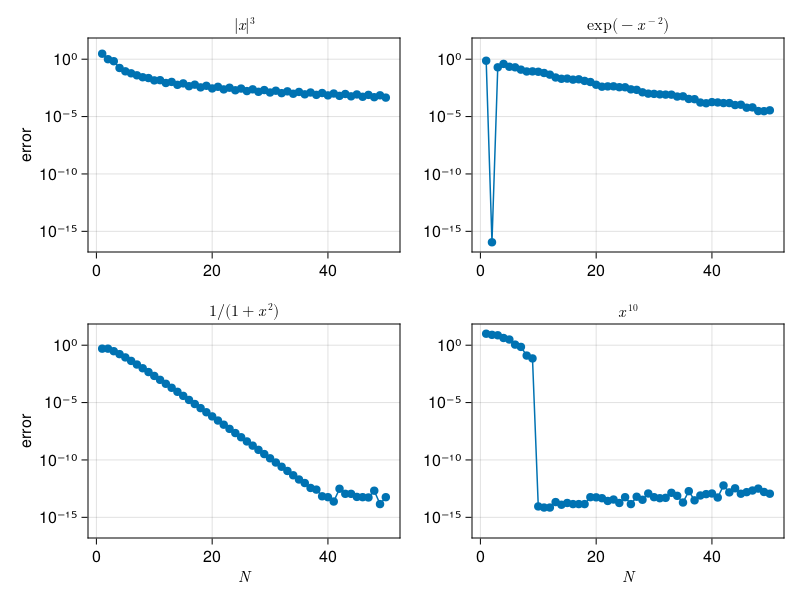

In [5]:
fig = Figure()
ax = [ Axis(fig[j,i], yscale=log10) for i in 1:2, j in 1:2 ]
for (ax,r) in zip(vec(ax),results)
    ax.title = r.title
    scatterlines!(ax, N, r.E)
end
linkxaxes!(ax...)
linkyaxes!(ax...)
ax[1,1].ylabel = ax[1,2].ylabel = "error"
ax[1,2].xlabel = ax[2,2].xlabel = L"N"
fig